In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
from tqdm.auto import tqdm
import torch
import torch.nn as nn
import torch.nn.functional as F

print(sys.version_info)
for module in mpl, np, pd, sklearn, torch:
    print(module.__name__, module.__version__)
    
device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")
print(device)


sys.version_info(major=3, minor=12, micro=3, releaselevel='final', serial=0)
matplotlib 3.10.0
numpy 2.0.2
pandas 2.2.3
sklearn 1.6.0
torch 2.5.1+cu118
cuda:0


## Dataset

实际上我们从chapter_2 开始就在使用该模块

In [2]:
from torch.utils.data import Dataset

class RandomDataset(Dataset):
    def __init__(self, labels):
        self.labels = labels
        
    def __getitem__(self, index):
        data = torch.mul(torch.randn(2), 0.1) + self.labels[index] # 生成两个服从标准正态分布的随机数（两个维度），然后乘以0.1，再加上label
        label = self.labels[index]
        return data, label # 返回的是一个元组,这里返回的数据格式决定我们遍历这个数据集时，每次迭代返回的数据格式
    
    def __len__(self):
        return len(self.labels)
    
#np.random.randint(2, size=1000)生成了一个长度为1000的随机标签数组，每个元素都是0或1
rd = RandomDataset(np.random.randint(2, size=1000))
print("数据集的长度：", len(rd))

for x,y in rd:
    print(x,y)
    break

数据集的长度： 1000
tensor([1.0215, 1.1507]) 1


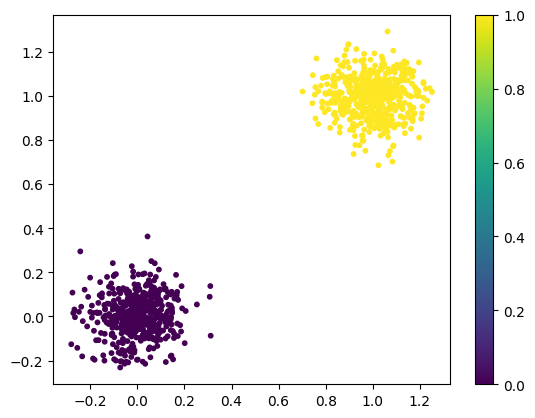

In [3]:
# 可视化随机数据集
x1 = []
x2 = []
labels = [] #标签

for (a,b), label in rd:
    x1.append(a)
    x2.append(b)
    labels.append(label)

    
plt.scatter(x1, x2, s=10, c=labels) # s是点的大小，c是颜色
plt.colorbar()
plt.show()

## DataLoader

In [4]:
from torch.utils.data import DataLoader

ld = DataLoader(rd, batch_size=8, shuffle=True) # batch_size是每次迭代返回的数据个数，shuffle是是否打乱数据集

for data, label in ld:
    print(data)
    print(label)
    break

tensor([[ 0.0928,  0.0087],
        [ 0.9790,  1.0560],
        [ 1.3282,  1.3220],
        [-0.0365,  0.0316],
        [ 0.0182, -0.0656],
        [-0.1011,  0.1332],
        [-0.0575,  0.0789],
        [ 0.0363,  0.0854]])
tensor([0, 1, 1, 0, 0, 0, 0, 0], dtype=torch.int32)


## tfrecord


复现论文的时候更多地发现使用 pyarrow 而不是 tfrecord

如果想在pytorch里使用tfrecord，可以参考 https://github.com/vahidk/tfrecord